# **Biblioteki**

In [ ]:
!pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 4.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import sklearn
import prince
from scipy.stats import chi2_contingency


#**Zbiór danych**

Zadanie pochodzi z https://maxhalford.github.io/prince/ca/

In [ ]:
dataset = prince.datasets.load_french_elections()
dataset

candidate,Arthaud,Dupont-Aignan,Hidalgo,Jadot,Lassalle,Le Pen,Macron,Mélenchon,Poutou,Pécresse,Roussel,Zemmour,Abstention,Blank
region,,,,,,,,,,,,,,
Auvergne-Rhône-Alpes,23137,98465,77570,224735,136436,943294,1175085,897434,30596,217906,96409,312916,1228490,70084
Bourgogne-Franche-Comté,10643,38691,26543,60235,49557,409639,394117,277899,12737,76654,33932,107057,456682,26381
Bretagne,12965,35116,43596,122198,58653,385393,647172,407527,19913,92808,51193,96984,543425,31867
Centre-Val de Loire,9256,31759,23162,54401,38659,347845,383851,251259,11226,71690,33590,88575,459528,23216
Corse,455,2600,1589,4801,15408,42283,26795,19779,1374,9363,4553,18936,90636,2521
Grand Est,18658,74918,40031,111960,77442,825219,762282,492439,22243,120931,47425,200265,1008344,42256
Guadeloupe,1084,2114,2266,1927,1033,24204,18137,75862,713,3979,668,3098,174592,2719
Guyane,297,717,535,940,516,6334,5101,18143,462,997,246,1573,65754,825
Hauts-de-France,20977,55439,40856,95234,62548,1015361,773221,577878,21150,107631,94831,179606,1146209,42994


#**Niezależność zmiennych**

Żeby móc przeprowadzić analizę korespondencji zmienne muszą być zależne.

**Czy region i kandydaci są zmiennymi zależnymi, czy nie są ? Czy można przeprowadzić analizę korespondencji?**

**H0:** Zmienne są niezależne

**H1:** Zmienne są zależne

In [ ]:
res = chi2_contingency(dataset)
res.pvalue

0.0

**ODP:**

#**Analiza korespondencji**

Celem analizy korespondencji jest znalezienie przestrzeni, która leży blisko punktów reprezentujacych profile. Chodzi o to, aby dokonać redukcji wymiaru z jak najmniejszą stratą informacji o wzajemnych odległościach między punktami w przestrzeni, czyli między kategoriami zmiennych.

#Wartości własne, poszukwanie wymiarów

Poniżej wyznaczamy wartości wariancji uchwyconej w każdym wymiarze analizy korespondencji, w oparciu o pojedynczą wartość własną każdego wymiaru.



In [ ]:
ca = prince.CA(
    n_components=10,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
ca = ca.fit(dataset)

Otrzymujemy 40.82% wariancji wyrażonej przez nasz pierwszy wymiar i 36.15% w naszym drugim wymiarze.

**Uwaga !** Było 12 kandydatów, ta przestrzeń jest jednak 14 wymiarowa (puste kartki i wstrzymanie się od głosu), przy czym 6 wymiarów wyjaśnia 99% zmienności w zbiorze.

**Właściwie wystarczyłoby wziąć 4 wartości własne, nie mniej dalsza analiza (patrz contributions) wskazuje na pewne informacje, które byśmy stracili o niektórych rejonach, czy kandydatach.**

Największa liczba wartości własnych, które mogą zostać wyznaczone z tablicy dwudzielczej jest równa liczbie wierszy pomniejszonej o 1, jeżeli w tablicy liczba wierszy jest nie większa niż liczba kolumn, lub liczbie kolumn minus 1, gdy kolumn jest mniej niż wierszy.

In [ ]:
ca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.021,40.82%,40.82%
1,0.018,36.15%,76.97%
2,0.005,10.08%,87.04%
3,0.004,8.07%,95.11%
4,0.002,2.95%,98.07%
5,0.000,0.84%,98.91%
6,0.000,0.62%,99.53%
7,0.000,0.26%,99.79%
8,0.000,0.11%,99.90%


#Współrzędne dla wierszy

In [ ]:
ca.row_coordinates(dataset)

,0,1,2,3,4,5,6,7,8,9
region,,,,,,,,,,
Auvergne-Rhône-Alpes,-0.058638,0.038303,0.000937,0.012354,-0.015810,-0.016621,-0.000294,-0.018714,-0.008567,-0.005289
Bourgogne-Franche-Comté,-0.070815,-0.077604,-0.016357,0.011408,-0.006633,-0.021620,-0.036851,-0.017688,0.004951,0.000317
Bretagne,-0.083655,0.110491,-0.058991,-0.092350,-0.013940,0.005336,0.036746,-0.001867,0.001638,-0.004826
Centre-Val de Loire,-0.024624,-0.055799,-0.046167,-0.014270,-0.022621,0.010829,-0.030648,-0.011949,0.011772,0.005142
Corse,0.127370,-0.281755,0.279328,-0.004643,-0.216221,0.141966,-0.030478,-0.002855,-0.032110,-0.006503
Grand Est,-0.013450,-0.130275,-0.054478,0.017534,-0.028360,-0.028150,-0.012903,0.024092,-0.004946,-0.000264
Guadeloupe,0.818951,-0.086920,0.084404,-0.095338,0.036858,-0.018237,0.010849,0.007462,-0.012210,-0.003019
Guyane,0.909384,-0.195087,0.074893,-0.131517,-0.136760,0.046531,0.055694,0.002019,0.003958,-0.020804
Hauts-de-France,0.013732,-0.190105,-0.077559,0.005697,0.074629,0.026322,0.006680,-0.003569,-0.004221,0.000011


In [ ]:
ca.plot(
    dataset,
    x_component=0,
    y_component=1,
    show_row_markers=True,
    show_column_markers=False,
    show_row_labels=True,
    show_column_labels=False
)

alt.LayerChart(...)

Na wykresie widać, że region Mayotte odstaje od pozostałych. Proszę podać dwóch kandydatów, którzy wygrali w tym regionie, dwoje z najgorszymi wynikami oraz sprawdzić, składowe o jakim indeksie wpłynęły na tą klasyfikację. Kogo było więcej: osób, które zagłosowały na zwycięzcę w tym regionie czy tych, które wstrzymały się od głosu?




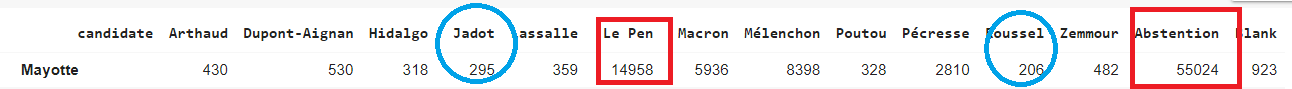

In [ ]:
ca.row_contributions_.style.format('{:.0%}')

,0,1,2,3,4,5,6,7,8,9
Auvergne-Rhône-Alpes,2%,1%,0%,0%,2%,8%,0%,32%,15%,11%
Bourgogne-Franche-Comté,1%,1%,0%,0%,0%,5%,18%,10%,2%,0%
Bretagne,2%,4%,4%,11%,1%,0%,23%,0%,0%,4%
Centre-Val de Loire,0%,1%,2%,0%,1%,1%,12%,4%,10%,3%
Corse,0%,2%,8%,0%,16%,24%,2%,0%,9%,1%
Grand Est,0%,8%,5%,1%,4%,15%,4%,36%,4%,0%
Guadeloupe,22%,0%,1%,1%,1%,1%,0%,0%,2%,0%
Guyane,9%,0%,0%,1%,3%,1%,2%,0%,0%,3%
Hauts-de-France,0%,18%,11%,0%,33%,15%,1%,1%,3%,0%
La Réunion,22%,1%,0%,2%,1%,8%,0%,0%,0%,11%


**ODP:**

**Zadanie:** Proszę narysować wykres dla najważniejszych składowych dla regionu Provence-Alpes-Côte d'Azur

In [ ]:
# Rozwiązanie
ca.plot(
    dataset,
    x_component=3,
    y_component=6,
    show_row_markers=True,
    show_column_markers=False,
    show_row_labels=True,
    show_column_labels=False
)

alt.LayerChart(...)

#Współrzędne dla kolumn

Współrzędne dla kolumn:

ca.column_coordinates(dataset)

Proszę wyznaczyć współrzędne dla kolumn i narysować wykres dla składowej 1 i 2, a także utworzyć tablicę procentową.

In [ ]:
# Rozwiązanie
ca.column_contributions_.style.format('{:.0%}')

,0,1,2
Le Pen,65%,0%,13%
Macron,0%,44%,30%
Mélenchon,32%,3%,44%
Abstention,3%,53%,12%


**Zadanie:** Kto jest po tej samej stronie osi x i y co Macron (w tej samej ćwiartce układu współrzędnych)? Proszę to sprawdzić dla najważniejszych dla Macrona składowych.


In [ ]:
# Rozwiązanie
ca.plot(
    dataset,
    x_component=3,
    y_component=6,
    show_row_markers=False,
    show_column_markers=True,
    show_row_labels=False,
    show_column_labels=True
)

alt.LayerChart(...)

**ODP:** Iidalgo; Roussel i ci co się wstrzymali

#Analiza dla 3 najważniejszych kandydatów względem wstrzymujących się od głosu.

In [ ]:
dataset[['Le Pen', 'Macron', 'Mélenchon', 'Abstention']].head()
# proszę usunąc pozostałe kolumny

candidate,Le Pen,Macron,Mélenchon,Abstention
region,,,,
Auvergne-Rhône-Alpes,943294,1175085,897434,1228490
Bourgogne-Franche-Comté,409639,394117,277899,456682
Bretagne,385393,647172,407527,543425
Centre-Val de Loire,347845,383851,251259,459528
Corse,42283,26795,19779,90636


In [ ]:
dataset = dataset[['Le Pen', 'Macron', 'Mélenchon', 'Abstention']]

In [ ]:
ca = prince.CA(
    n_components=10,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
ca = ca.fit(dataset)

In [ ]:
ca.row_contributions_.style.format('{:.0%}')

,0,1,2
Auvergne-Rhône-Alpes,0%,2%,0%
Bourgogne-Franche-Comté,3%,0%,0%
Bretagne,0%,6%,11%
Centre-Val de Loire,1%,0%,3%
Corse,0%,5%,3%
Grand Est,7%,1%,3%
Guadeloupe,5%,16%,0%
Guyane,1%,8%,3%
Hauts-de-France,13%,4%,3%
La Réunion,4%,19%,0%


In [ ]:
ca.plot(
    dataset,
    x_component=0,
    y_component=1,
    show_row_markers=True,
    show_column_markers=False,
    show_row_labels=True,
    show_column_labels=False
)

alt.LayerChart(...)

In [ ]:
ca.column_contributions_.style.format('{:.0%}')

,0,1,2
Le Pen,65%,0%,13%
Macron,0%,44%,30%
Mélenchon,32%,3%,44%
Abstention,3%,53%,12%


In [ ]:
ca.plot(
    dataset,
    x_component=0,
    y_component=2,
    show_row_markers=False,
    show_column_markers=True,
    show_row_labels=False,
    show_column_labels=True
)

alt.LayerChart(...)

In [ ]:
ca.plot(
    dataset,
    x_component=1,
    y_component=2,
    show_row_markers=False,
    show_column_markers=True,
    show_row_labels=False,
    show_column_labels=True
)

alt.LayerChart(...)

In [ ]:
ca.plot(
    dataset,
    x_component=0,
    y_component=2,
    show_row_markers=True,
    show_column_markers=True,
    show_row_labels=True,
    show_column_labels=True
)

alt.LayerChart(...)